In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iamprateek/store-transaction-data -p /content

Dataset URL: https://www.kaggle.com/datasets/iamprateek/store-transaction-data
License(s): other
100% 513k/513k [00:00<00:00, 1.60MB/s]
100% 513k/513k [00:00<00:00, 1.60MB/s]


In [6]:
!unzip /content/store-transaction-data.zip

Archive:  /content/store-transaction-data.zip
  inflating: Hackathon_Ideal_Data.csv  
  inflating: Hackathon_Mapping_File.csv  
  inflating: Hackathon_Validation_Data.csv  
  inflating: Hackathon_Working_Data.csv  
  inflating: Sample Submission.csv   


In [7]:
import pandas as pd

ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")
mapping_file = pd.read_csv("Hackathon_Mapping_File.csv")
validation_data = pd.read_csv("Hackathon_Validation_Data.csv")
working_data = pd.read_csv("Hackathon_Working_Data.csv")
sample_submission = pd.read_csv("Sample Submission.csv")

print("Ideal Data:")
print(ideal_data.head())
print("\nMapping File:")
print(mapping_file.head())
print("\nValidation Data:")
print(validation_data.head())
print("\nWorking Data:")
print(working_data.head())
print("\nSample Submission:")
print(sample_submission.head())

Ideal Data:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  

Mapping

In [8]:
print("Missing values in Ideal Data:")
print(ideal_data.isnull().sum())
print("\nMissing values in Mapping File:")
print(mapping_file.isnull().sum())
print("\nMissing values in Validation Data:")
print(validation_data.isnull().sum())
print("\nMissing values in Working Data:")
print(working_data.isnull().sum())
print("\nMissing values in Sample Submission:")
print(sample_submission.isnull().sum())

Missing values in Ideal Data:
MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

Missing values in Mapping File:
File Name             22
Column Name            0
Column Description     0
dtype: int64

Missing values in Validation Data:
ID           0
STORECODE    0
MONTH        0
GRP          0
dtype: int64

Missing values in Working Data:
MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

Missing values in Sample Submission:
ID            0
TOTALVALUE    0
dtype: int64


In [9]:
ideal_data.drop_duplicates(inplace=True)
mapping_file.drop_duplicates(inplace=True)
validation_data.drop_duplicates(inplace=True)
working_data.drop_duplicates(inplace=True)
sample_submission.drop_duplicates(inplace=True)

In [22]:
print("Unique values in Category (Ideal Data):")
print(ideal_data['GRP'].unique())
print("Unique values in Subcategory (Ideal Data):")
print(ideal_data['SGRP'].unique())
print("Unique values in Brand (Ideal Data):")
print(ideal_data['BRD'].unique())

Unique values in Category (Ideal Data):
['HAIR CONDITIONERS' 'LIQUID TOILET SOAPS  (8/93)' 'DETERGENT CAKES/BARS'
 'SOAP CAKES/BARS' 'WASHING POWDERS/LIQUIDS' 'CLEANERS - UTENSIL' 'BLUES'
 'PRE-POST WASH PRODUCTS' 'SHAMPOO - BY SEGMENTS' 'HAIR REMOVER'
 'HAIR DYES     (1/76)' 'AFTER SHAVE LOTIONS' 'TOOTH PASTES'
 'SHOE POLISHES' 'CLEANERS - GLASS' 'SAFETY RAZOR BLADES'
 'SANITARY NAPKINS' 'TOOTH POWDERS' 'TWIN BLADES' 'TALCUM POWDERS'
 'SKIN CREAMS' 'BABY OILS / MASSAGE OILS' 'PRICKLY HEAT POWDER'
 'CLEANERS - FLOOR' 'OLIVE OILS' 'CLEANERS - TOILET' 'BEVERAGES'
 'MILK POWDERS' 'PACKAGED PURE GHEE' 'MILK FOODS'
 'GLUCOSE POWDER & TABLET' 'ANTISEPTIC CREAMS' 'RUBEFACIENT'
 'CONFECTIONERY - COUGH LOZENGE' 'CHYAVANPRASH' 'ALL AIR FRESHNERS(01/03)'
 'PACKAGED TEA' 'COFFEE' 'DIGESTIVES' 'OTHER SCOURERS'
 'HOME INSECTICIDES CTG  (8/93)' 'MOSQUITO REPELLANTS CTG (8/93)'
 'DIAPERS       (8/93)' 'TOOTH BRUSH   (7/93)' 'BATTERIES'
 'BREAKFAST CEREALS' 'SCOURING PADS/SCRUBS' 'TOILET SOAPS (04/00)'

In [10]:
print("Summary statistics")
print(working_data.describe())

Summary statistics
                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26895.000000  26895.000000  26895.000000  26895.000000  26895.000000
mean      15.163971    278.847163      4.114854     67.887907     52.862412
std        8.960140    542.012679     95.826730    118.127648     85.061997
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     65.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [11]:
import matplotlib.pyplot as plt

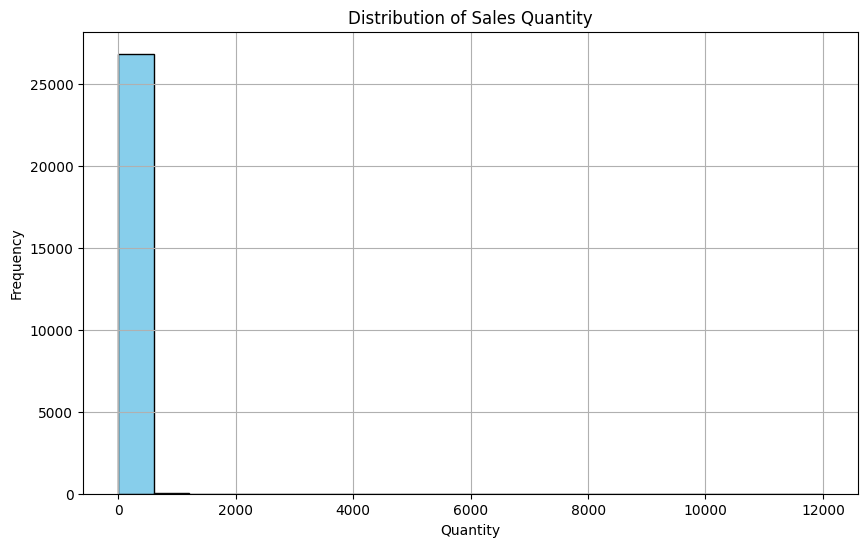

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(working_data['QTY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

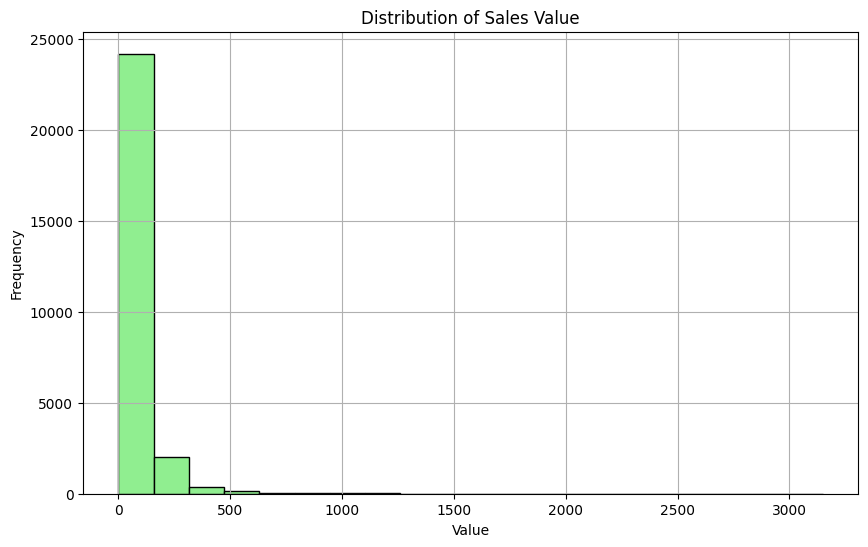

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(working_data['VALUE'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sales Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

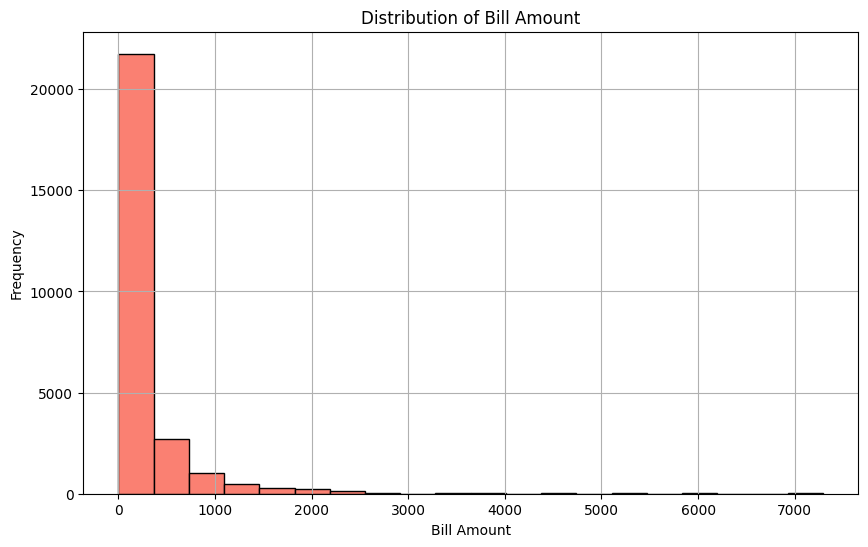

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(working_data['BILL_AMT'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

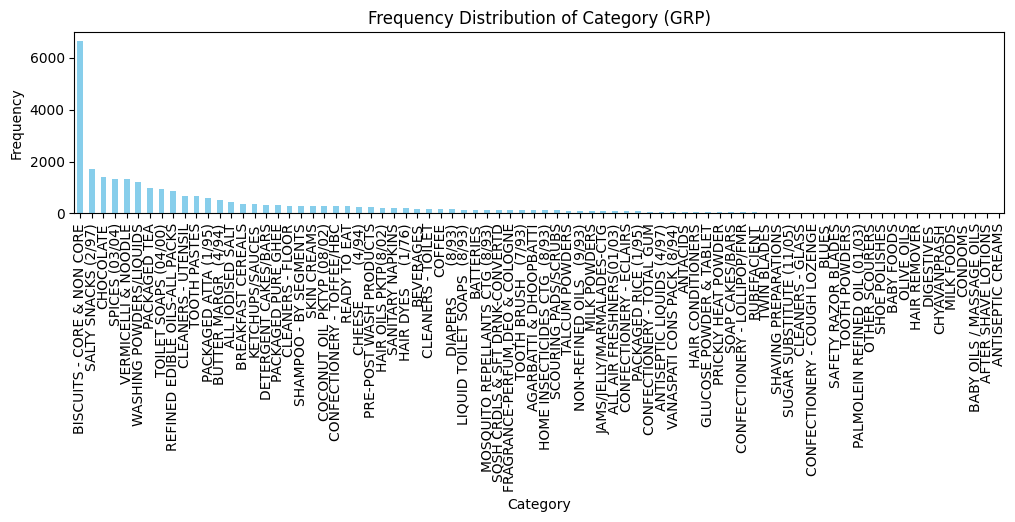

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
working_data['GRP'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Category (GRP)')
plt.xlabel('Category')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

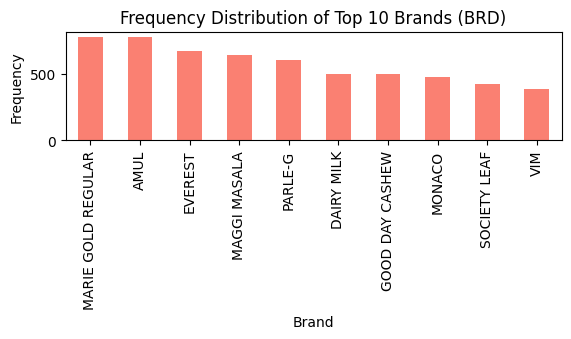

In [16]:
plt.subplot(3, 1, 3)
working_data['BRD'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Frequency Distribution of Top 10 Brands (BRD)')
plt.xlabel('Brand')
plt.ylabel('Frequency')

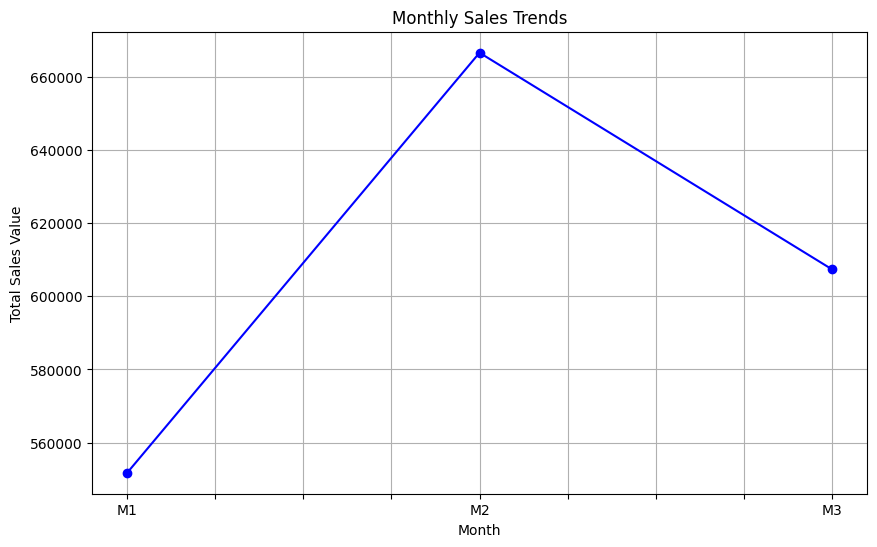

In [17]:
monthly_sales = working_data.groupby('MONTH')['VALUE'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


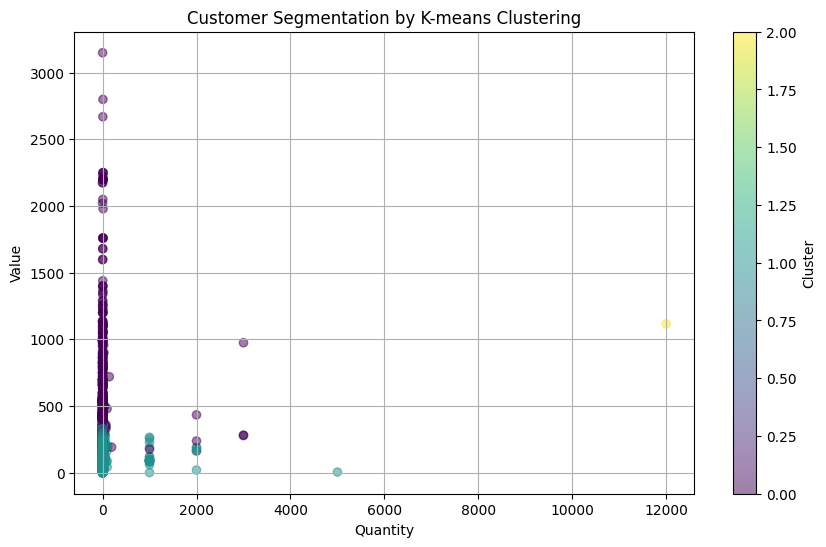

In [19]:
cluster_data = working_data[['QTY', 'VALUE', 'BILL_AMT']]
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
kmeans = KMeans(n_clusters=3, random_state=42)
working_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(working_data['QTY'], working_data['VALUE'], c=working_data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation by K-means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

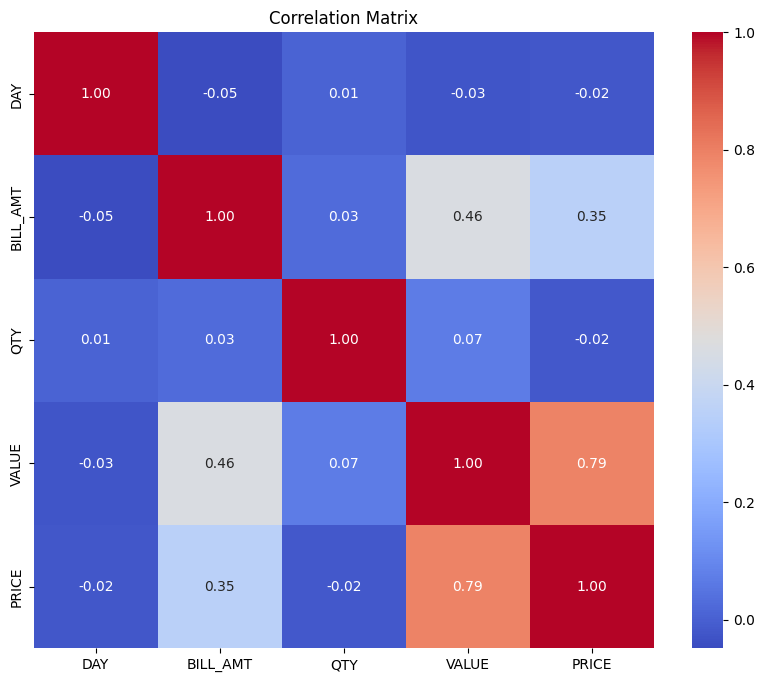

In [20]:
numeric_columns = working_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = working_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()